## This version does the ZOGY but computes the kernels in fourier space, and then convolves images in real space.

Do it with new testing object.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd

Use the code from `diffimTests.py`.

In [2]:
import diffimTests as dit
reload(dit)

# Let's try w same parameters as ZOGY paper.
sky = 300.

testObj = dit.DiffimTest(imSize=(512,512), sky=sky, offset=[0,0], psf_yvary_factor=0., varSourceChange=1500., 
                         theta1=0., theta2=-45., im2background=0., n_sources=50, sourceFluxRange=(500,30000), 
                         seed=66, psfSize=13)

print dit.computeClippedImageStats(testObj.im1.im)
print dit.computeClippedImageStats(testObj.im2.im)
print dit.computeClippedImageStats(testObj.im1.var)
print dit.computeClippedImageStats(testObj.im2.var)

(0.058941207521673616, 17.142582277831181, -74.0, 1741.5550996425638)
(0.16735074378053241, 17.213851327082029, -82.0, 1169.0572762553779)
(300.05894120752163, 17.142582277831185, 226.0, 2041.5550996425638)
(300.16735074378062, 17.213851327082025, 218.0, 1469.0572762553779)


In [3]:
reload(dit)
testObj.doAL(spatialKernelOrder=0, spatialBackgroundOrder=1)
print dit.computeClippedImageStats(testObj.D_AL.im)
testObj.doZOGY()
print dit.computeClippedImageStats(testObj.D_ZOGY.im)

(-0.0031786170914847606, 0.98196168826031993, -4.7257007356942937, 5.7559089875964249)
(-0.00091946279369321457, 0.98658699241521086, -4.867257132332699, 4.4549309554969909)


/Users/dreiss/lsstsw/miniconda/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/dreiss/lsstsw/miniconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/dreiss/lsstsw/miniconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/dreiss/lsstsw/miniconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:1147: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)


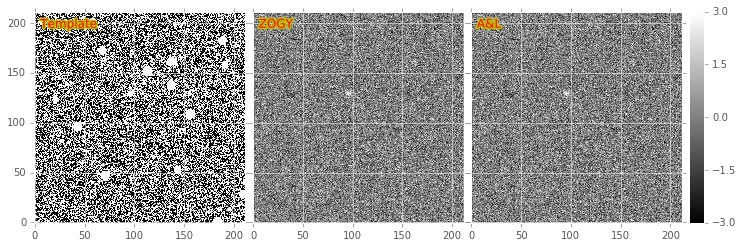

In [4]:
xim = np.arange(-256, 256, 1)
yim = xim.copy()

fig = plt.figure(1, (12, 12))
x1d, x2d, y1d, y2d = 150, 512-150, 150, 512-150   # limits for display
extent = (xim.min()+150, xim.max()-150, yim.min()+150, yim.max()-150)
dit.plotImageGrid((testObj.im1.im[x1d:x2d,y1d:y2d], 
                   testObj.D_ZOGY.im[x1d:x2d,y1d:y2d], 
                   testObj.D_AL.im[x1d:x2d,y1d:y2d]), 
                  clim=(-3,3), titles=['Template', 'ZOGY', 'A&L'])

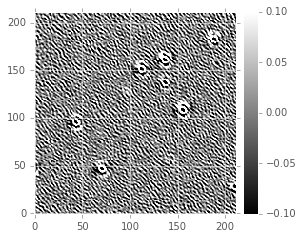

In [5]:
D = testObj.D_ZOGY.im.copy()
D_AL = testObj.D_AL.im.copy()

D[0,:] = D[:,0] = D[-1,:] = D[:,-1] = 0.
D_AL[D == 0] = 0.
fig = plt.figure(1, (4, 4))
dit.plotImageGrid(((D - D_AL)[x1d:x2d,y1d:y2d],), clim=(-0.1, 0.1))

Work on variance planes.

(0.010771440925179442, 0.97869443986691962, -4.5278728182815842, 9.1269917837247494)
(6.8054576238223949e-05, 0.0060991321441833234, -0.028160865936552131, 0.062271139296159995)
[[  245.89925013   279.36159005  1423.89964966  2923.89964966]] 9.12699178372
29


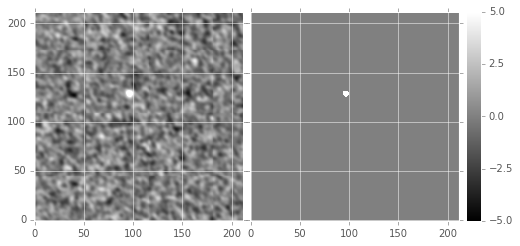

In [6]:
reload(dit);

S_corr, S = testObj.S_corr_ZOGY.im, testObj.S_ZOGY.im
print dit.computeClippedImageStats(S_corr)
print dit.computeClippedImageStats(S)
changedCentroid = testObj.centroids[testObj.changedCentroidInd, :]
print changedCentroid, S_corr[np.rint(changedCentroid[0,1]).astype(int), np.rint(changedCentroid[0,0]).astype(int)]
print (S_corr > 5.).sum() + (S_corr < -5.).sum()
fig = plt.figure(1, (8, 8))
dit.plotImageGrid((S_corr[x1d:x2d,y1d:y2d], ((S_corr > 5.)*5.0 + (S_corr < -5.)*-5.0)[x1d:x2d,y1d:y2d]), 
                  clim=(-5.,5.))

### Try the reverse case where science is narrower than template...

For A&L, turn on pre-filtering.

In [7]:
reload(dit)
testObj2 = testObj.clone()
testObj2.reverseImages()

testObj2.doZOGY()
dstats_ZOGY = dit.computeClippedImageStats(testObj2.D_ZOGY.im)
print dstats_ZOGY
testObj2.doAL(spatialKernelOrder=0, spatialBackgroundOrder=1, doPreConv=False)
print dit.computeClippedImageStats(testObj2.D_AL.im)
D_AL = testObj2.D_AL  # save the non-preconv-ed version
D_kappa = testObj2.kappa_AL
testObj2.doAL(spatialKernelOrder=0, spatialBackgroundOrder=1, doDecorr=False, doPreConv=True)
print dit.computeClippedImageStats(testObj2.D_AL.im)
D_AL_noDecorr = testObj2.D_AL  # save the non-preconv-ed version
D_kappa_noDecorr = testObj2.kappa_AL
testObj2.doAL(spatialKernelOrder=0, spatialBackgroundOrder=1, doPreConv=True)
print dit.computeClippedImageStats(testObj2.D_AL.im)

(0.00091946279369321457, 0.98658699241521086, -4.4549309554969909, 4.867257132332699)
(-0.0037926939291338772, 0.96502411595321702, -6.7190792224760898, 19.216479180087219)
(-0.0028241356338684215, 0.76808277991228646, -7.3575387112263808, 19.582235039171628)
(-0.00064114608015793562, 0.16517680766589529, -1.4833516325951248, 2.5034416106238506)


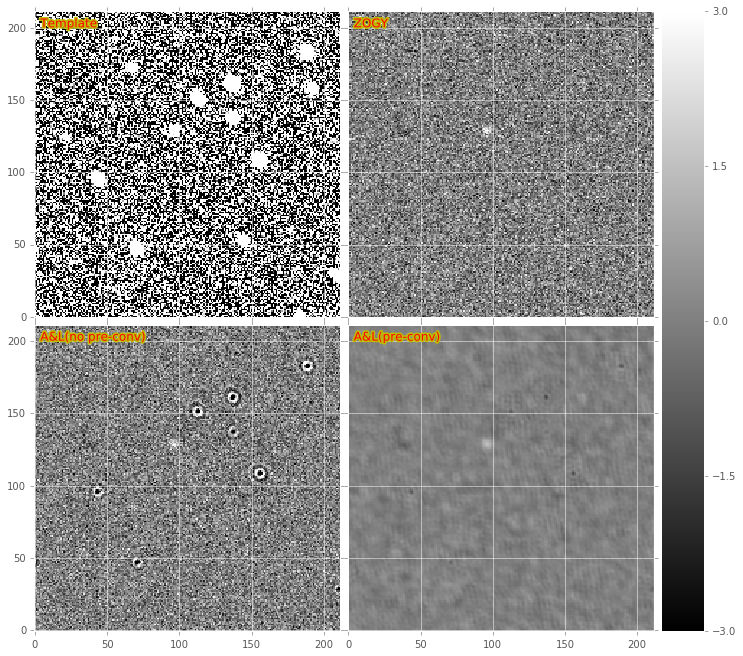

In [8]:
fig = plt.figure(1, (12, 12))
dit.plotImageGrid((testObj2.im1.im[x1d:x2d,y1d:y2d], -testObj2.D_ZOGY.im[x1d:x2d,y1d:y2d], 
                   -D_AL.im[x1d:x2d,y1d:y2d], -testObj2.D_AL.im[x1d:x2d,y1d:y2d]), 
                  clim=(-3,3), titles=['Template', 'ZOGY', 'A&L(no pre-conv)', 'A&L(pre-conv)'])

(-0.00064114608015793562, 0.16517680766589529, -1.4833516325951248, 2.5034416106238506)
(0.011464727609797975, 0.4671927554775247, -3.5024186506691839, 14.638901000654782)
122


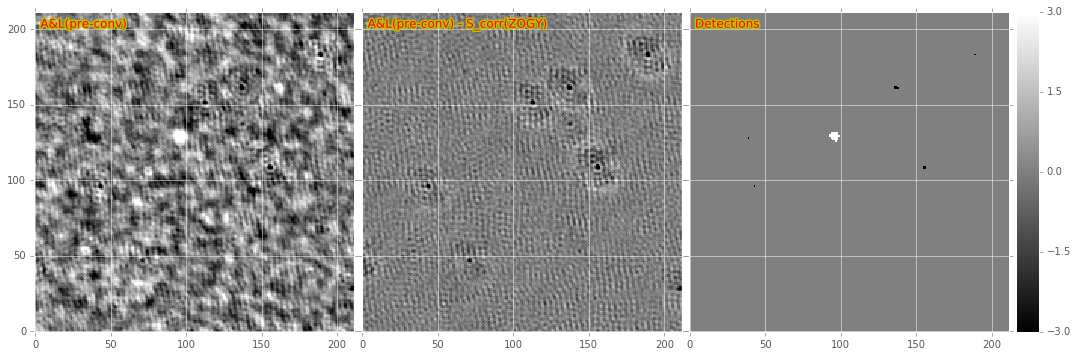

In [9]:
dstats = dit.computeClippedImageStats(testObj2.D_AL.im)
print dstats
#D_AL_pc_ALZC /= 3.0
tmp = (testObj2.D_AL.im - dstats[0]) / dstats[1]
print dit.computeClippedImageStats(tmp-testObj2.S_corr_ZOGY.im)
print (tmp > 5.).sum() + (tmp < -5.).sum()
fig = plt.figure(1, (18, 18))
dit.plotImageGrid((-tmp[x1d:x2d,y1d:y2d], -(tmp-testObj2.S_corr_ZOGY.im)[x1d:x2d,y1d:y2d], 
                   ((tmp > 5.)*-5. + (tmp < -5.)*5.)[x1d:x2d,y1d:y2d]), clim=(-3., 3.),
                 titles=['A&L(pre-conv)', 'A&L(pre-conv) - S_corr(ZOGY)', 'Detections'])

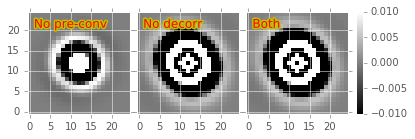

In [10]:
dit.plotImageGrid((D_kappa, D_kappa_noDecorr, testObj2.kappa_AL), titles=['No pre-conv', 'No decorr', 'Both'], 
                  clim=(-0.01,0.01))

## Do it in the stack!

In [11]:
reload(dit)

testObj = dit.DiffimTest(imSize=(512,512), sky=sky, offset=[0,0], psf_yvary_factor=0., varSourceChange=1500., 
                         theta1=0., theta2=-45., im2background=0., n_sources=50, sourceFluxRange=(500,30000), 
                         seed=66, psfSize=13)
testObj.doZOGY()
D = testObj.D_ZOGY.im.copy()
testObj.doAL(spatialKernelOrder=0, spatialBackgroundOrder=1, kernelSize=15)
D_AL = testObj.D_AL.im.copy()

(300.05894120752163, 17.142582277831185, 226.0, 2041.5550996425638)
(-0.0011288934662965098, 0.98164378160901988, -4.867257132332699, 4.4549309554969909)
(-0.003427635282508805, 0.97750060224218471, -4.7269930129861057, 5.7665220154401364)
(0.029451357, 24.097832, -115.96163, 185.05299)
(0.0012023466, 0.9837898, -4.7341137, 7.5547566)

(4.3744504331539421e-05, 0.085399161037063798, -2.4216700324631706, 7.0854886539800006)
(-0.0026002599209431713, 0.088613189671705617, -1.9697875767327251, 5.1590753086344687)
(-0.0036255790574062315, 0.053891084266261366, -3.1109832959332042, 3.0450198181062071)


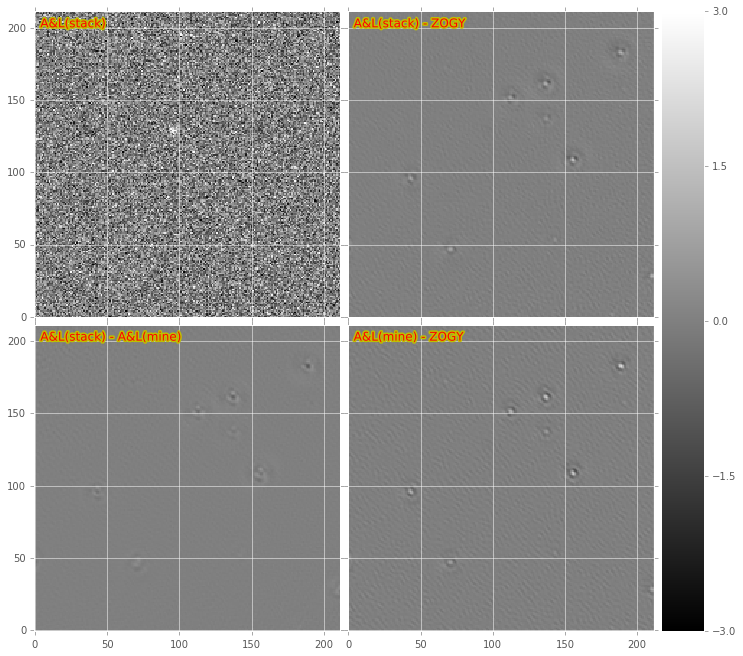

In [12]:
D[0,:] = D[:,0] = D[-1,:] = D[:,-1] = 0.
D_AL[D == 0] = 0.

result = testObj.doALInStack(doDecorr=True)
D_stack = result.decorrelatedDiffim.getMaskedImage().getImage().getArray()

print dit.computeClippedImageStats(testObj.im1.var)
tmp = result.matchedExposure.getMaskedImage().getVariance().getArray()
tmp[(D == 0) | np.isnan(tmp) | np.isinf(tmp)] = np.nan
var2 = dit.computeClippedImageStats(tmp)[0]
D_stack[(D == 0) | np.isnan(D_stack)] = np.nan

# D_stack is shifted again, so unshift it.
print dit.computeClippedImageStats(D)
print dit.computeClippedImageStats(D_AL)
print dit.computeClippedImageStats(D_stack)
D_stack /= np.sqrt(testObj.im1.metaData['sky'] + testObj.im1.metaData['sky'])
print dit.computeClippedImageStats(D_stack)
print ""
print dit.computeClippedImageStats(D_stack-D)
print dit.computeClippedImageStats(D_AL-D)
print dit.computeClippedImageStats(D_AL-D_stack)
fig = plt.figure(1, (12, 12))
dit.plotImageGrid((D_stack[x1d:x2d,y1d:y2d], (D_stack-D)[x1d:x2d,y1d:y2d], 
                (D_stack-D_AL)[x1d:x2d,y1d:y2d], (D_AL-D)[x1d:x2d,y1d:y2d]), 
                  titles=['A&L(stack)', 'A&L(stack) - ZOGY', 'A&L(stack) - A&L(mine)' ,'A&L(mine) - ZOGY'], 
                  clim=(-3,3))

Reverse the template and science image. Pre-convolution and decorrelation? Need to implement them myself since right now they are part of pipe_tasks, not ip_diffim.

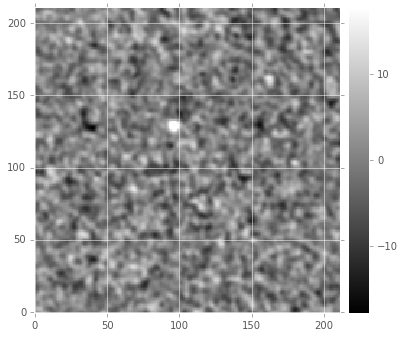

In [13]:
testObj2 = testObj.clone()
testObj2.reverseImages()
result = testObj2.doALInStack(doPreConv=True, doDecorr=False)

fig = plt.figure(1, (6, 6))
dit.plotImageGrid((-result.subtractedExposure.getMaskedImage().getImage().getArray()[x1d:x2d,y1d:y2d],))

In [14]:
reload(dit)

testObj2 = testObj.clone()
testObj2.reverseImages()
result = testObj2.doALInStack(doPreConv=True, doDecorr=True)

(21, 21) (21, 21)


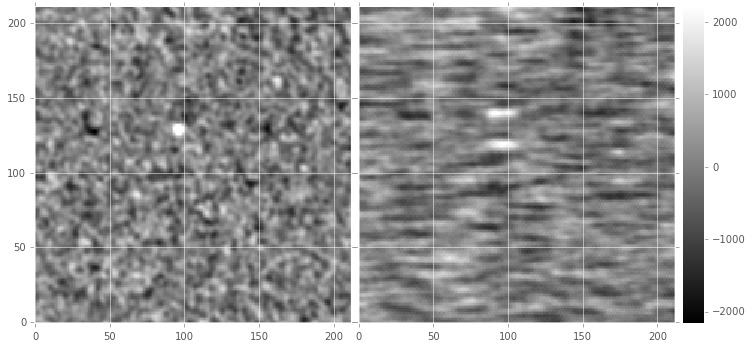

In [15]:
fig = plt.figure(1, (12, 12))
dit.plotImageGrid((-result.subtractedExposure.getMaskedImage().getImage().getArray()[x1d:x2d,y1d:y2d],
                   -result.decorrelatedDiffim.getMaskedImage().getImage().getArray()[x1d:x2d,y1d:y2d]))

In [16]:
reload(dit)
testObj = dit.DiffimTest(imSize=(512,512), sky=sky, offset=[0,0], psf_yvary_factor=0., varSourceChange=1500., 
                         theta1=0., theta2=-45., im2background=0., n_sources=50, sourceFluxRange=(500,30000), 
                         seed=66, psfSize=13)

In [17]:
%timeit result = testObj.doALInStack(doPreConv=True, doDecorr=False)

1 loop, best of 3: 2.21 s per loop


In [18]:
%timeit result = testObj.doALInStack(doPreConv=False, doDecorr=True)

1 loop, best of 3: 1.83 s per loop


In [19]:
%timeit result = testObj.doALInStack(doPreConv=False, doDecorr=False)

1 loop, best of 3: 1.42 s per loop


In [26]:
%timeit result = testObj.doZOGY(computeScorr=False)

1 loop, best of 3: 839 ms per loop


In [27]:
%timeit result = testObj.doZOGY(computeScorr=True)

1 loop, best of 3: 1.1 s per loop


In [22]:
%timeit result = testObj.doZOGY(computeScorr=False, inImageSpace=False)

10 loops, best of 3: 82.7 ms per loop


In [23]:
%timeit result = testObj.doZOGY(computeScorr=True, inImageSpace=False)

1 loop, best of 3: 373 ms per loop


In [24]:
%timeit result = testObj.doAL(doPreConv=True)

1 loop, best of 3: 11.3 s per loop


In [25]:
%timeit result = testObj.doAL(doPreConv=False)

1 loop, best of 3: 10 s per loop
